Import Numpy, matplotlip for displaying data, and Open-CV for the manipulation

In [91]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.ndimage import gaussian_filter

Read image in to a 3Darray.

In [92]:
img = cv.imread('rm.png')
img = cv.normalize(img, None, 0, 1.0, cv.NORM_MINMAX, dtype=cv.CV_32F)
np.shape(img)

(1836, 3264, 3)

Have a quick look at the first row, just the first 5 columns, and the BGR values for each pixel.

In [93]:

print(img[0:1, 0:5, 0:3])

[[[0.7372549  0.8941177  0.97647065]
  [0.45882356 0.5568628  0.60784316]
  [0.04313726 0.05490196 0.05882353]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]]


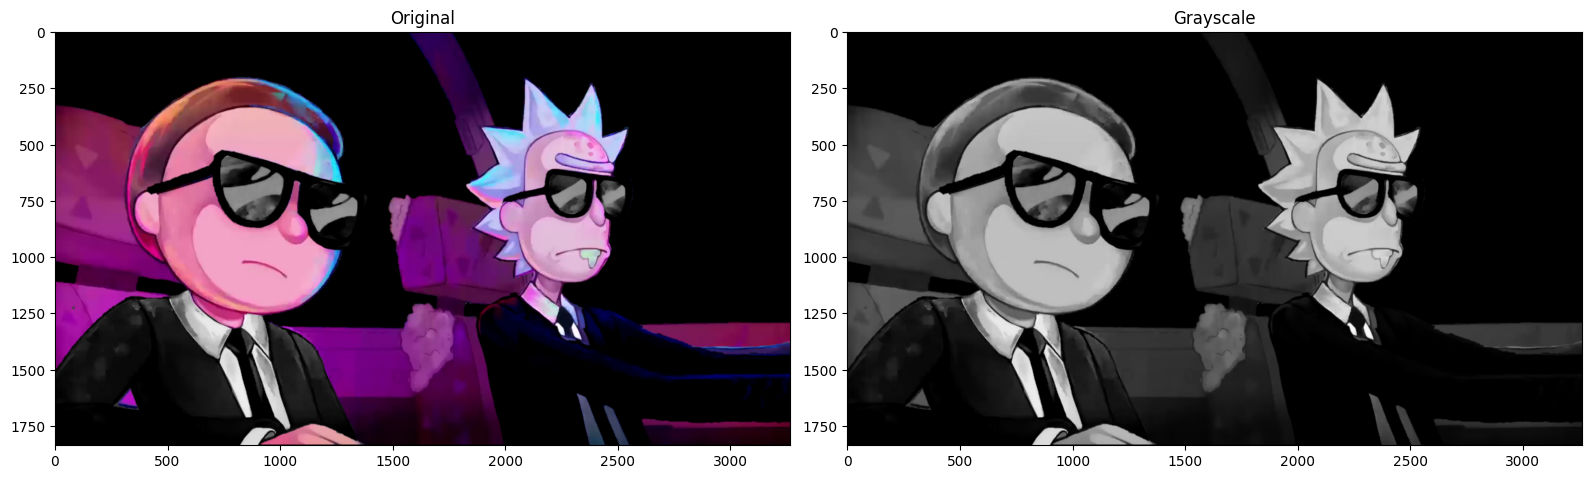

In [94]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.tight_layout()

ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("Original")

ax[1].imshow(cv.cvtColor(gray_img, cv.COLOR_BGR2RGB))
ax[1].set_title("Grayscale")
plt.show()

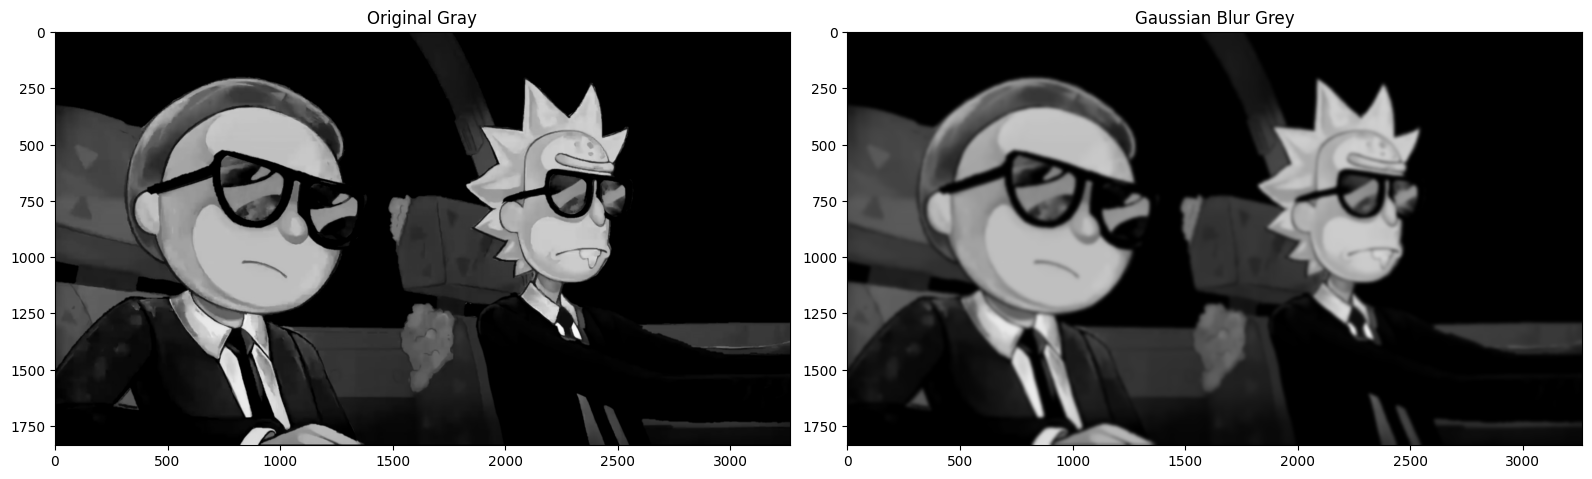

In [95]:
plt.close('all')

g_blur = gaussian_filter(gray_img, sigma=7)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.tight_layout()

ax[0].imshow(cv.cvtColor(gray_img, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Gray")

ax[1].imshow(cv.cvtColor(g_blur, cv.COLOR_BGR2RGB))
ax[1].set_title("Gaussian Blur Grey")


plt.show()


In [96]:
blur_kernel = np.ones((16,16))
blur_kernel /= 265.
blur_kernel


array([[0.00377358, 0.00377358, 0.00377358, 0.00377358, 0.00377358,
        0.00377358, 0.00377358, 0.00377358, 0.00377358, 0.00377358,
        0.00377358, 0.00377358, 0.00377358, 0.00377358, 0.00377358,
        0.00377358],
       [0.00377358, 0.00377358, 0.00377358, 0.00377358, 0.00377358,
        0.00377358, 0.00377358, 0.00377358, 0.00377358, 0.00377358,
        0.00377358, 0.00377358, 0.00377358, 0.00377358, 0.00377358,
        0.00377358],
       [0.00377358, 0.00377358, 0.00377358, 0.00377358, 0.00377358,
        0.00377358, 0.00377358, 0.00377358, 0.00377358, 0.00377358,
        0.00377358, 0.00377358, 0.00377358, 0.00377358, 0.00377358,
        0.00377358],
       [0.00377358, 0.00377358, 0.00377358, 0.00377358, 0.00377358,
        0.00377358, 0.00377358, 0.00377358, 0.00377358, 0.00377358,
        0.00377358, 0.00377358, 0.00377358, 0.00377358, 0.00377358,
        0.00377358],
       [0.00377358, 0.00377358, 0.00377358, 0.00377358, 0.00377358,
        0.00377358, 0.00377358, 

In [97]:
conv_blur =signal.convolve2d(gray_img, blur_kernel, boundary='symm', mode='same').astype(np.float32)
conv_blur

array([[0.03966408, 0.03966408, 0.03966408, ..., 0.        , 0.        ,
        0.        ],
       [0.03966408, 0.03966408, 0.03966408, ..., 0.        , 0.        ,
        0.        ],
       [0.03966408, 0.03966408, 0.03966408, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.01739933, 0.01739933,
        0.01739933],
       [0.        , 0.        , 0.        , ..., 0.01730155, 0.01730155,
        0.01730155],
       [0.        , 0.        , 0.        , ..., 0.01730155, 0.01730155,
        0.01730155]], dtype=float32)

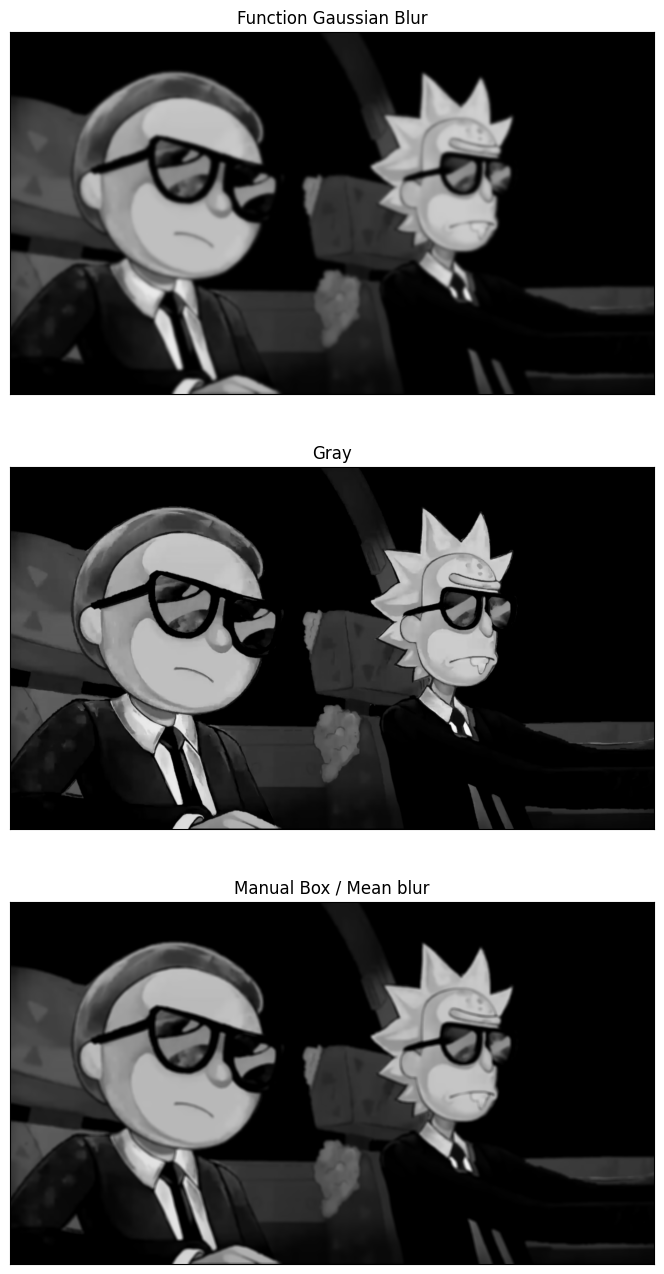

In [98]:
fig, ax = plt.subplots(3, figsize=(32, 16))

ax[0].imshow(cv.cvtColor(g_blur, cv.COLOR_BGR2RGB))
ax[0].set_title("Function Gaussian Blur")

ax[1].imshow(cv.cvtColor(gray_img, cv.COLOR_BGR2RGB))
ax[1].set_title("Gray")

ax[2].imshow(cv.cvtColor(conv_blur, cv.COLOR_BGR2RGB))
ax[2].set_title("Manual Box / Mean blur")


plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])


plt.show()

In [99]:
Kx = np.array([[1,2,1],[0, 0, 0],[-1, -2, -1]])
Ky = np.matrix.transpose(Kx)

dx = conv_blur =signal.convolve2d(g_blur, Kx, boundary='symm', mode='same').astype(np.float32)
dy = conv_blur =signal.convolve2d(g_blur, Ky, boundary='symm', mode='same').astype(np.float32)

mag = np.sqrt(np.square(dx)+ np.square(dy) )

array([[0.0036736 , 0.00806085, 0.01249521, ..., 0.        , 0.        ,
        0.        ],
       [0.00804661, 0.01059438, 0.0140036 , ..., 0.        , 0.        ,
        0.        ],
       [0.01247079, 0.01398993, 0.01631728, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.0025406 , 0.00254074,
        0.00254081],
       [0.        , 0.        , 0.        , ..., 0.00157486, 0.00157492,
        0.00157495],
       [0.        , 0.        , 0.        , ..., 0.00053373, 0.00053366,
        0.00053363]], dtype=float32)

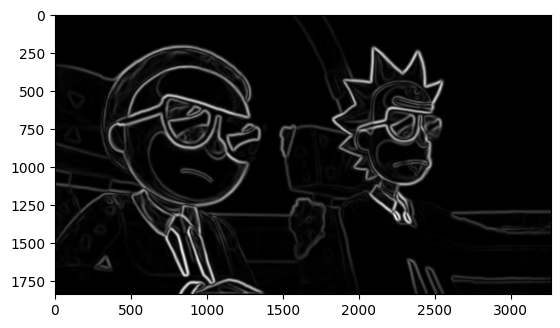

In [100]:
plt.imshow(mag)
mag

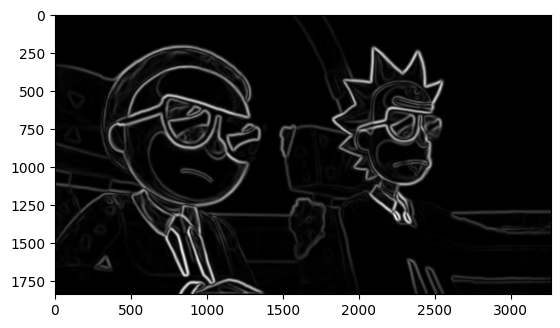

In [101]:
plt.imshow(mag, cmap='gray')
plt.show()
